In [35]:
from IPython.core.display import HTML

HTML("""
<style>
.text_cell_render p, .text_cell_render li {
    line-height: 4;  /* Adjust the line height for paragraph and list elements */
}
</style>
""")

# Lecture 3: Data Visualization in Python

Making informative visualization, or plots, is one of the most important tasks in data analysis.

- Data analysis is fundamental as part of the exploratory process -- i.e. to identify outliers, possible transformations, or to brainstorm ideas for models.

- When you need to present the results of your research to other shareholders, displaying graphical results enables you to get your point across more easily.

Several libraries exist in Python for data visualization:

- Matplotlib: Matplotlib is a comprehensive library for creating visualizations in Python. It is particularly good for creating basic graphs like line charts, bar charts, and histograms. For those who are familiar with MATLAB, Matplotlib offers a similar user experience with its pyplot module.

- Seaborn: Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn comes with several built-in themes and color palettes to enhance the aesthetic appeal and readability of the graphs. It simplifies tasks such as visualizing multivariate relationships, producing a heatmap, or creating a time-series analysis.

- Plotly: Plotly is an interactive graphing library that lets you create highly interactive and informative plots and dashboards.



## 3.1. Matplotlib

Matplotlib was started in 2002 with the objective of creating a MATLAB-like plotting interface for Python. It is highly customizable. 

### 3.1.1. Creating a line plot in Matplotlib

In [36]:
import numpy as np
import matplotlib.pyplot as plt

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

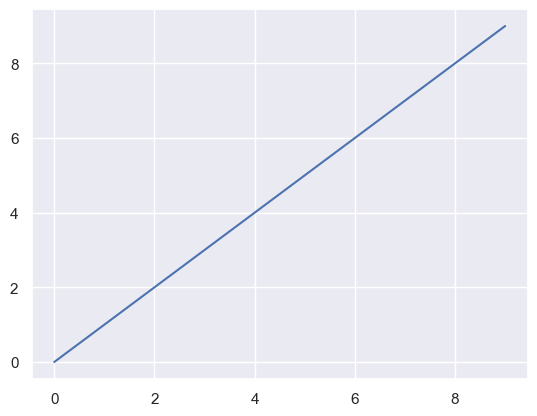

In [37]:
plt.plot(data) # Creates a simple lineplot.

### 3.1.2. Subplots

Use subplots when you want to include several axes in the same figure.

Remember: 

- Figure: the "canvas" on which you draw plots. A Figure can contain multiple axes.

- Axes: what we typically think of an individual plot or graph.

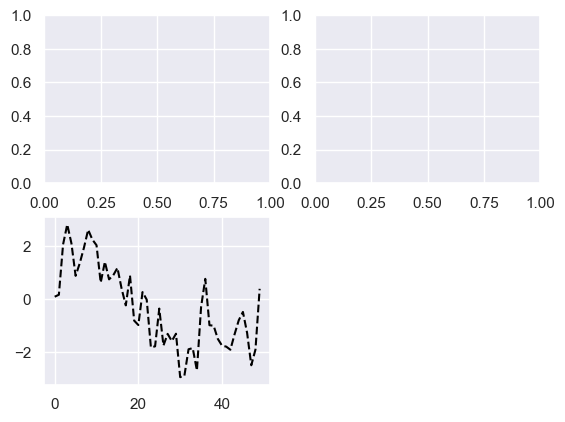

In [38]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax3.plot(np.random.randn(50).cumsum(), color = "black", linestyle = "dashed");

# Matplotlib returns objects that reference the plot subcomponent that was just added.
# To suppress the output, you can add a semicolon to the end of the statement.

### 3.1.3. Histograms and scatterplots

Besides drawing lineplots, you can create more complicated graphs in Matplotlib, such as histograms and scatterplots. See below.

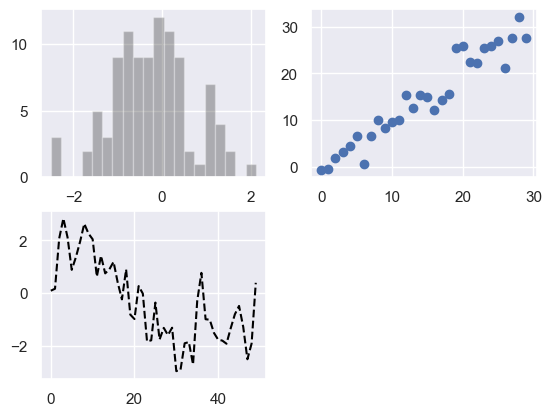

In [39]:
ax1.hist(np.random.randn(100), bins = 20, color = "k", alpha = 0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));
fig

### 3.1.4. Ticks, labels, and legends

Let's create a simple graph of a random walk. A random walk is a common model for the price of a stock, for example: each jump is normally identically distributed and independent from each other.

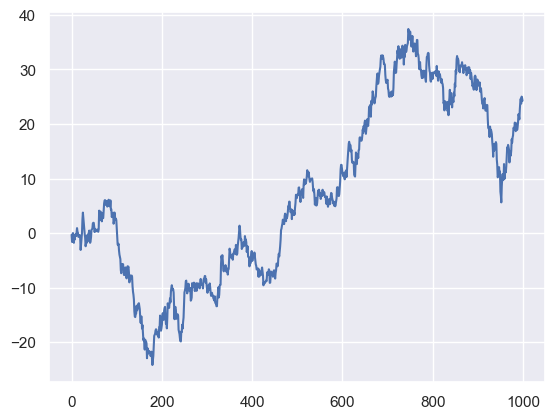

In [40]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum())

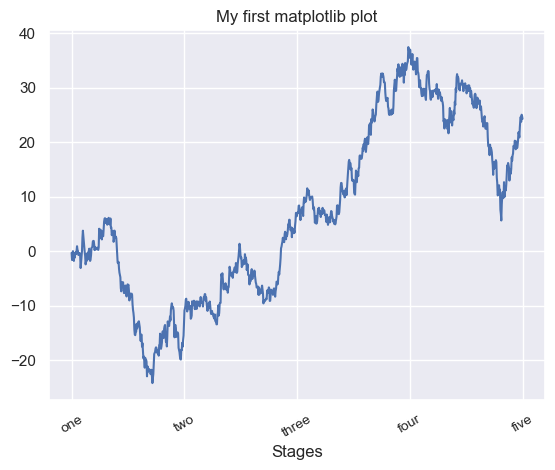

In [41]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation = 30, fontsize = "small")
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")
fig

### 3.1.5. Changing configurations

It is possible that you want to change the standard plotting configurations. If you do, you may call `plt.rc` as follows:

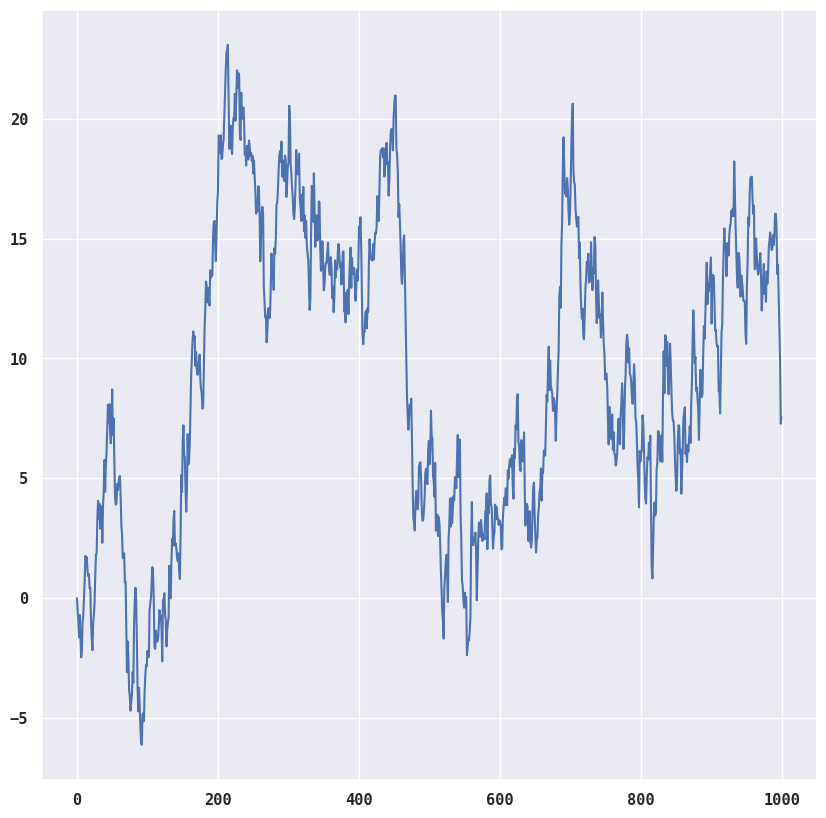

In [42]:
plt.rc('figure', figsize=(10, 10))
plt.rc("font", family = "monospace", weight = "bold", size = 20)
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum())

### 3.1.6. Saving figures

Saving a plot for future use is easy.

In [43]:
fig.savefig("figpath.png", dpi = 400)

## IN-CLASS:

The following dataset has the mean annual temperature at the Central Park of New York City.
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
temperatures = [56.7, 56.4, 57.3, 55.3, 54.4, 56.7, 57.2, 56.3, 55.9, 55.6, 57.3, 56.9, 56.3, 57.9]

1. Create a line plot with years on the x-axis and temperatures on the y-axis.

2. Add a title to the plot.

3. Label the x-axis as "Year" and the y-axis as "Average Temperature (°F)".

4. Change the line color to blue.

5. Restrict the range of your temperatures to between 54 and 58.


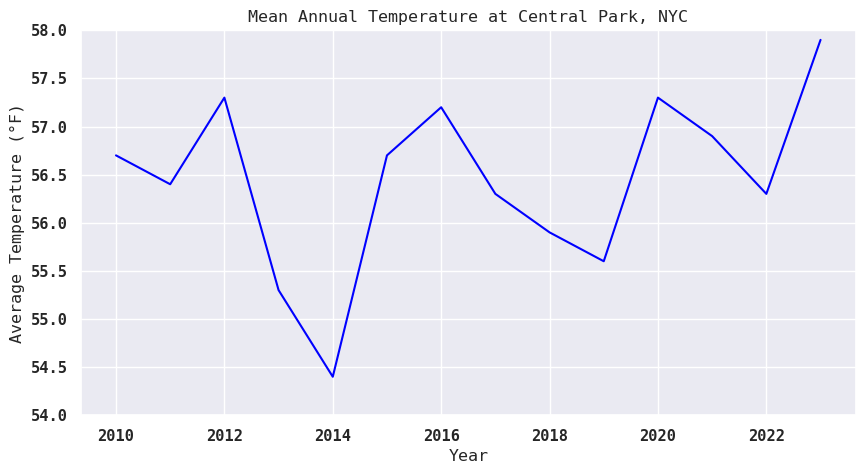

In [44]:
import matplotlib.pyplot as plt
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
temperatures = [56.7, 56.4, 57.3, 55.3, 54.4, 56.7, 57.2, 56.3, 55.9, 55.6, 57.3, 56.9, 56.3, 57.9]

plt.figure(figsize=(10, 5))
plt.plot(years, temperatures, color='blue')  # Set line color to blue
plt.title("Mean Annual Temperature at Central Park, NYC")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.ylim(54, 58)  # Restrict temperature range
plt.grid(True)

# Show plot
plt.show()

## 3.2. Pandas' plotting methods

You may also call `plot()` from a `pd.Series` or `pd.DataFrame` object. It is however just a wrapper (i.e. an alias) for Matplotlib's `plt.plot()` function.

In [45]:
import pandas as pd
df = pd.DataFrame(np.random.standard_normal((10,4)).cumsum(0), index = np.arange(0, 100, 10), columns = list("ABCD"))
df

,A,B,C,D
0,0.165238,-0.494531,0.465936,-0.162115
10,0.302764,-0.677003,0.219541,-0.517426
20,-0.268484,-1.397068,0.291520,-0.150596
30,-0.739596,-1.551490,0.211568,-1.059278
40,-1.150516,-0.448642,-0.002002,-3.009625
50,-0.461063,-0.056096,0.618080,-1.835791
60,-1.826277,0.463192,1.188941,-2.007800
70,-1.522757,-0.320598,1.661493,-1.830545
80,-0.493025,0.101699,1.833373,-2.380908
90,-1.247973,-0.191536,2.234777,-2.910445


<AxesSubplot: title={'center': 'My first pandas plot'}>

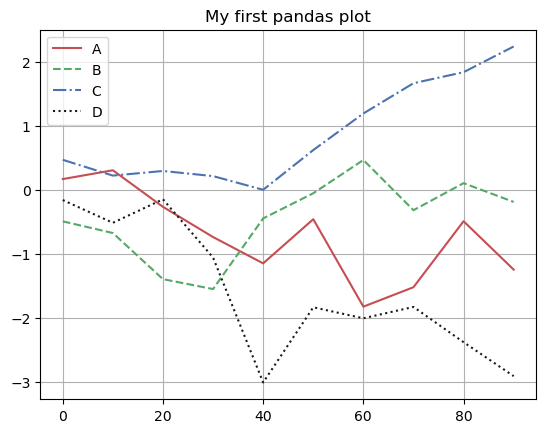

In [46]:
# Restore Matplotlib defaults:
plt.rcdefaults()
df.plot(kind = "line", style=["r-", "g--", "b-.", "k:"], title = "My first pandas plot", grid = True)
# Other possible arguments above: "bar", "barh", "hist", "box", "kde", "area", "scatter",  "pie"

## 3.3. Seaborn

- With data that requires aggregation or summarization before making a plot, using the `seaborn` package can make things much simpler.

- `seaborn` is able to make complex data visualizations with a few lines of code. It is a high-level visualization library built on top of `matplotlib`. 

The following dataframe contains data about restaurant tipping.

In [47]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Pandas's `crosstab` method is a convenient way to cross-tabulate frequencies for a pair of variables.

In [48]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


Since there are not many one- or six-person parties, I remove them here:

In [49]:
party_counts = party_counts.loc[:, 2:5]

### 3.3.1. A stacked barplot

In [50]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<AxesSubplot: xlabel='day'>

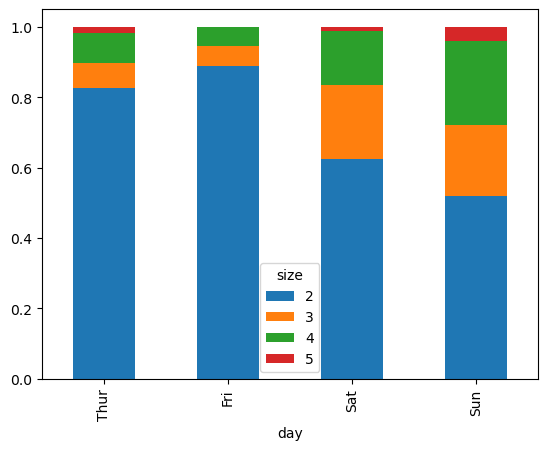

In [51]:
party_pcts.plot.bar(stacked=True) #BLANK

With data that requires aggregation or summarization before making a plot, using `seaborn` can make things much simpler. The following steps show you how to install and import `seaborn`. 

In [52]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [53]:
import seaborn as sns

In [54]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


`seaborn`'s `barplot` method is able to cakculate the average `tip_pct` per weekday, including a 95% confidence interval.

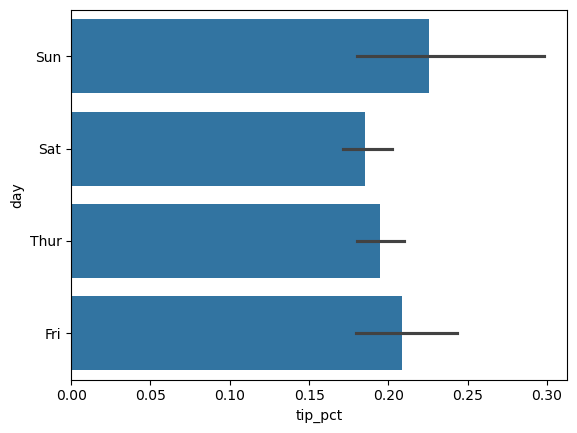

In [55]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h");

We can split our representation by an additional categorical variable using the `hue` method.

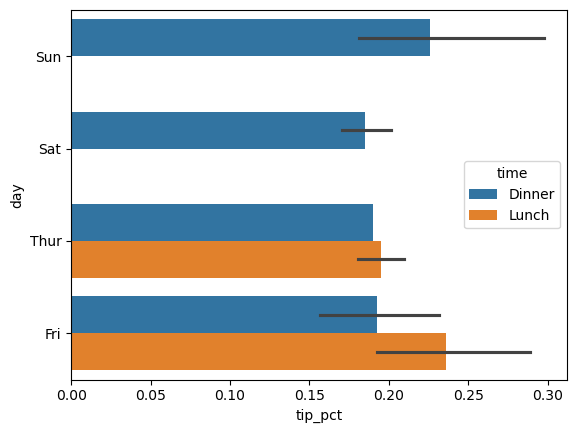

In [56]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h");

### 3.3.2. Histograms

A histogram is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted.

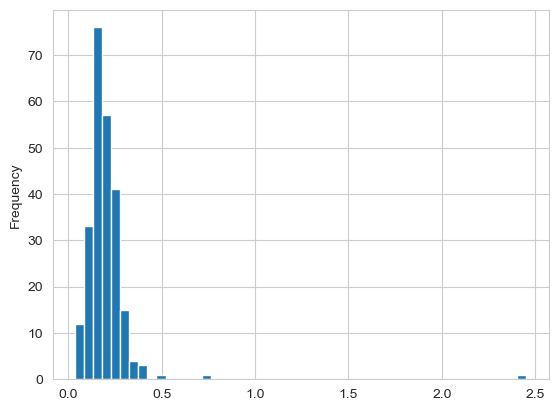

In [57]:
sns.set_style("whitegrid") # Try commenting this line
tips["tip_pct"].plot.hist(bins=50);

### 3.3.3. Density plots

Density plots are formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of "kernels". Thus, density plots are also known as kernel density estimate (KDE) plots.

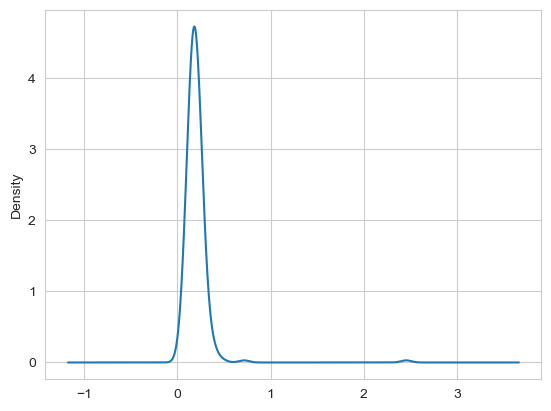

In [58]:
tips["tip_pct"].plot.density();

### 3.3.4. Scatter plots

Scatterplots can be a useful way of examining the relatinship between two one-dimensional datasets. Here, we load the `macrodata` dataset, select a few variables, and compute log differences.

In [59]:
macro = pd.read_csv("macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


We can then use seaborn's `regplot` method, which makes a scatter plot and fits a linear regression line.

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

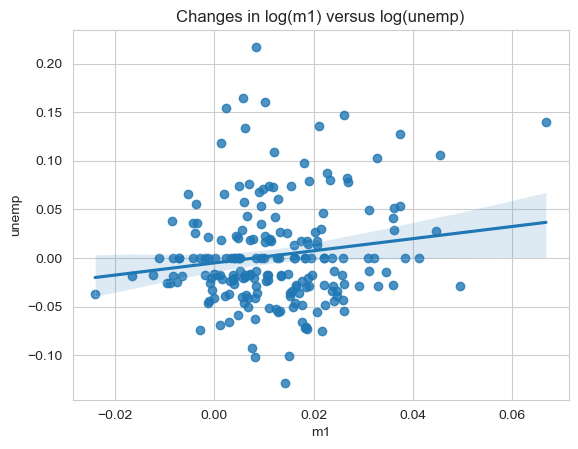

In [60]:
plt.figure()
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

### 3.3.5. Pairplots: investigating pairwise relationships

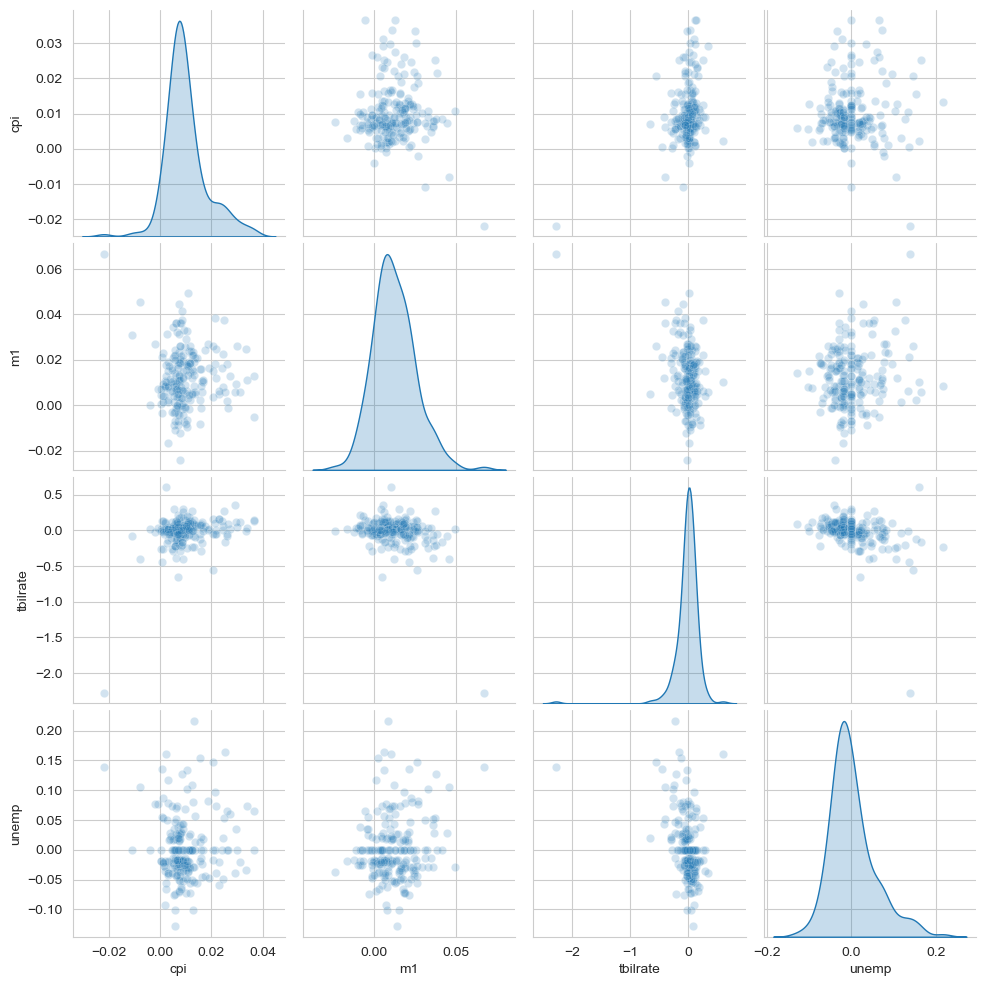

In [61]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

### 3.3.6. Box-and-whiskers plot

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs ($IQR = Q_3 - Q_1$) of the lower and upper quartile, and then observations that fall outside this range are displayed independently.

This is a common way of representing the variance in your data across different categories.

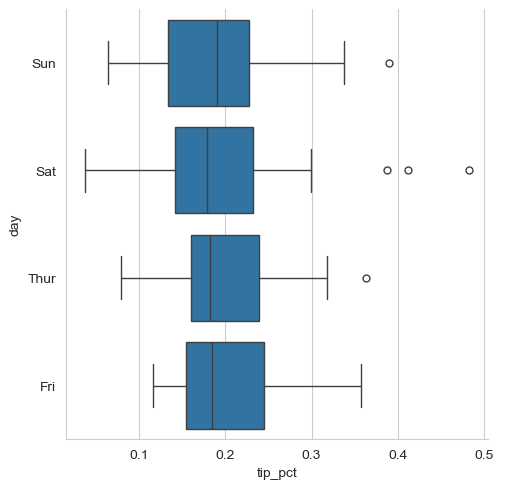

In [62]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])

## IN-CLASS:

Using Seaborn, complete the tasks as follows.

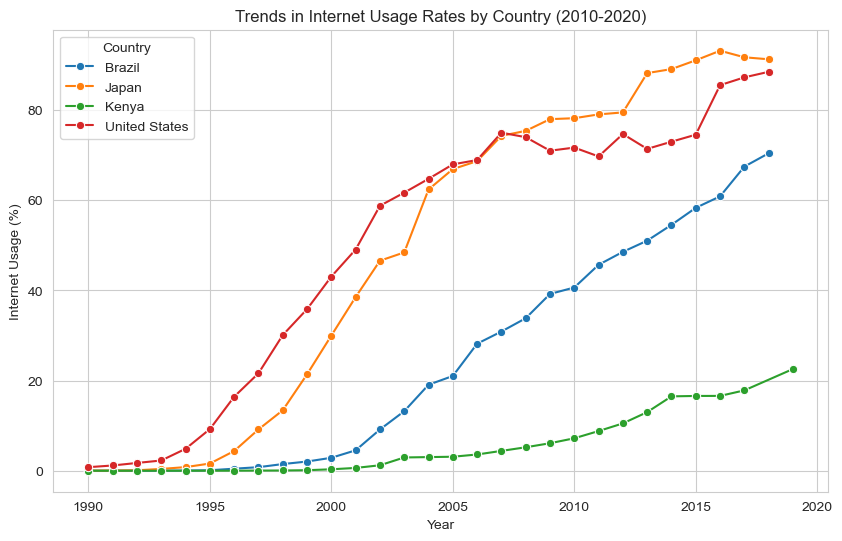

,Country,Code,Year,Internet_Usage
781,Brazil,BRA,1990,0.000000
782,Brazil,BRA,1991,0.003288
783,Brazil,BRA,1992,0.012946
784,Brazil,BRA,1993,0.025498
785,Brazil,BRA,1994,0.037673
...,...,...,...,...
6800,United States,USA,2014,73.000000
6801,United States,USA,2015,74.554202
6802,United States,USA,2016,85.544421
6803,United States,USA,2017,87.274889


In [63]:
import seaborn as sns
df = pd.read_csv("internet_users.csv")
df.columns = ['Country', 'Code', 'Year', 'Internet_Usage']
# Using Pandas, loc and "isin", filter only countries with the codes: USA, BRA, JPN, and KEN.
# Feel free to add any other country of your interest.
df = (df.
      loc[df["Code"].isin(["USA", "BRA", "JPN", "KEN"]),:])
df
plt.figure(figsize=(10, 6))
# Create a plot of internet usage with a line for each country. Use any markers to indicate the data points.
sns.lineplot(x='Year', y='Internet_Usage', hue='Country', data=df, marker='o')
plt.title('Trends in Internet Usage Rates by Country (2010-2020)')
# Add labels to the axes.
plt.ylabel('Internet Usage (%)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.show()
df

## IN-CLASS:

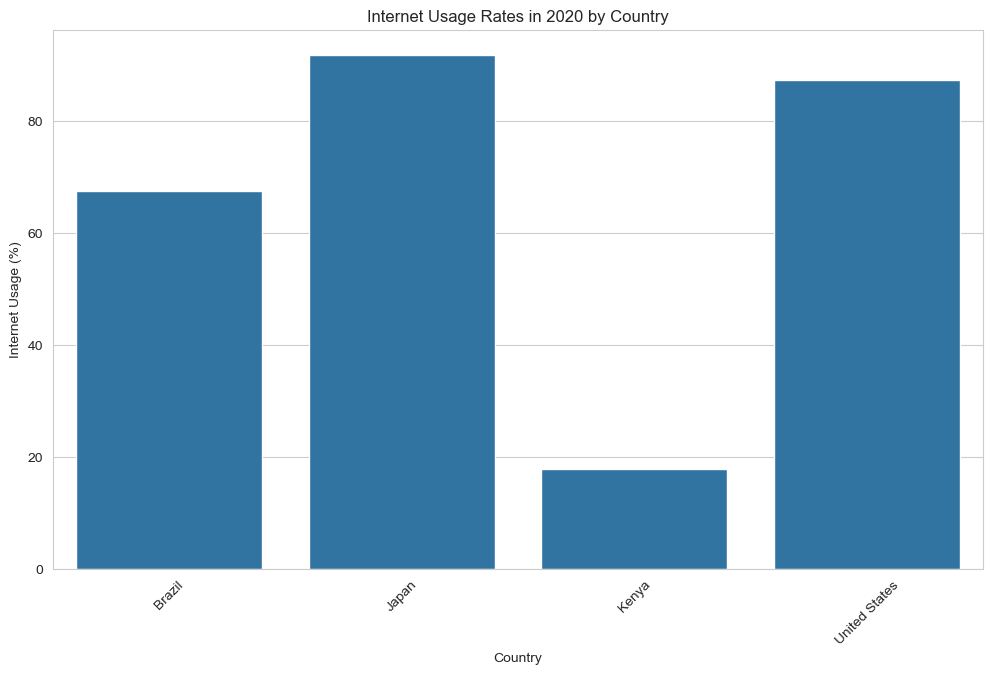

In [64]:
latest_data = df[df['Year'] == 2017]
plt.figure(figsize=(12, 7))
# Create a barplot with Internet Usage by Country, using the data in latest_data.
sns.barplot(x='Country', y='Internet_Usage', data=latest_data)
plt.title('Internet Usage Rates in 2020 by Country')
plt.ylabel('Internet Usage (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

### 3.3.7. Faceted logistic regression

Creating a faceted logistic regression on the Titanic dataset.

In [65]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [66]:
sns.set_theme(style="darkgrid")

# Load the example Titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Let's show the survival probability to the Titanic as a function of age and sex. To do so, we can plot the data using `lmplot`, which is able to create multiple subplots, and conveniently fit a logistic curve to them.

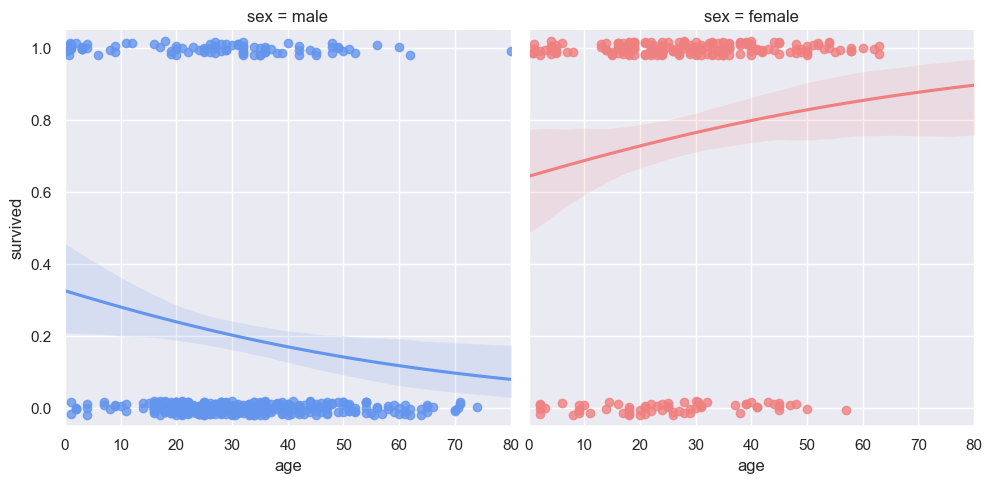

In [67]:
# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

### 3.3.8. Heatmaps

Heatmaps are another useful method to display heterogeneity of co-ocurrence of pairs. They are also useful when displaying correlations among pairs of variables.

<AxesSubplot: xlabel='year', ylabel='month'>

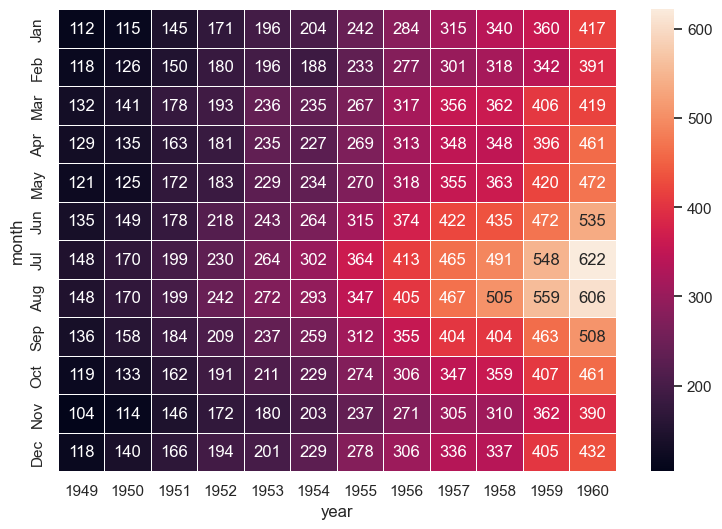

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = (
    flights_long
    .pivot(index="month", columns="year", values="passengers")
)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

[*********************100%%**********************]  5 of 5 completed
/var/folders/82/qc43_tjd601__84ds5cl2fyw0000gn/T/ipykernel_21293/1161229512.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Stock', y='Monthly Return', data=monthly_returns_melted, palette="muted")


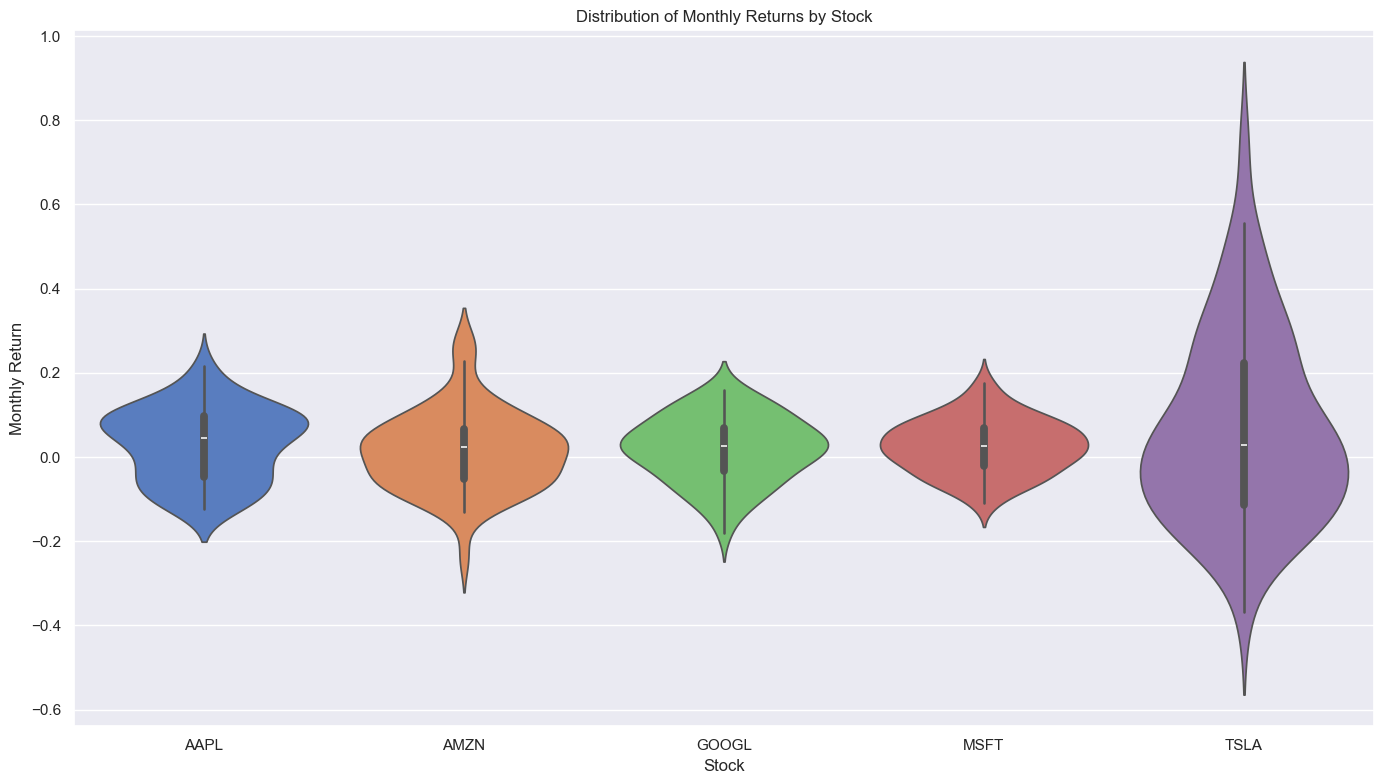

In [69]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock symbols for analysis
stocks = ['AAPL', 'MSFT', 'TSLA', 'GOOGL', 'AMZN']

# Fetch historical data for the last 5 years
start_date = "2019-01-01"
end_date = "2024-01-01"
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate monthly returns
monthly_returns = data.resample('M').ffill().pct_change()

# Melt the DataFrame for easier plotting with seaborn
monthly_returns_melted = monthly_returns.reset_index().melt(id_vars=['Date'], var_name='Stock', value_name='Monthly Return')

# Remove NaN values to avoid errors in plotting
monthly_returns_melted.dropna(inplace=True)

# Plotting with seaborn
plt.figure(figsize=(14, 8))
sns.violinplot(x='Stock', y='Monthly Return', data=monthly_returns_melted, palette="muted")
plt.title('Distribution of Monthly Returns by Stock')
plt.ylabel('Monthly Return')
plt.xlabel('Stock')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock symbols for analysis
stocks = ['AAPL', 'AMZN',  'GOOGL','MSFT', "NFLX", "NVDA",  'TSLA']

# Fetch historical data for the last 5 years
start_date = "2019-01-01"
end_date = "2024-01-01"
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate monthly returns
monthly_returns = data.resample('M').ffill().pct_change()

# Melt the DataFrame for easier plotting with seaborn
monthly_returns_melted = monthly_returns.reset_index().melt(id_vars=['Date'], var_name='Stock', value_name='Monthly Return')

# Remove NaN values to avoid errors in plotting
monthly_returns_melted.dropna(inplace=True)

[**********************71%%********              ]  5 of 7 completed

[*********************100%%**********************]  7 of 7 completed


## IN-CLASS: Correlation plots

The previous code snippet conveniently downloads stock returns for the "Magnificent Seven" tech stocks for a five-year period. Using Seaborn, create a heatmap with the correlation plot between all the pairs of stocks. Using dataframe `monthly_returns_melted`, do:

Do the following:
- Use the `pivot` function to pivot your dataset from long to wide. As row indices, use the `Date`s; as column indices, use `Stock`.
- Create cross-correlation pairs between all the pairs of stocks.
- Create a heatmap.

/var/folders/82/qc43_tjd601__84ds5cl2fyw0000gn/T/ipykernel_22111/150285259.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  corr = monthly_returns_melted.pivot("Date", "Stock", "Monthly Return").corr()


<AxesSubplot: xlabel='Stock', ylabel='Stock'>

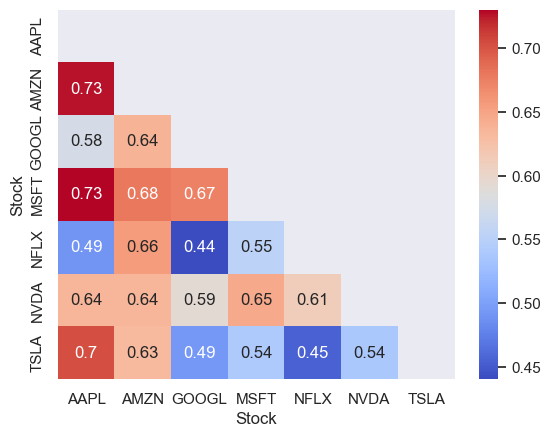

In [ ]:
# Insert code here
import numpy as np
corr = monthly_returns_melted.pivot("Date", "Stock", "Monthly Return").corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap="coolwarm")

[*********************100%%**********************]  5 of 5 completed
/var/folders/82/qc43_tjd601__84ds5cl2fyw0000gn/T/ipykernel_22111/1161229512.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Stock', y='Monthly Return', data=monthly_returns_melted, palette="muted")


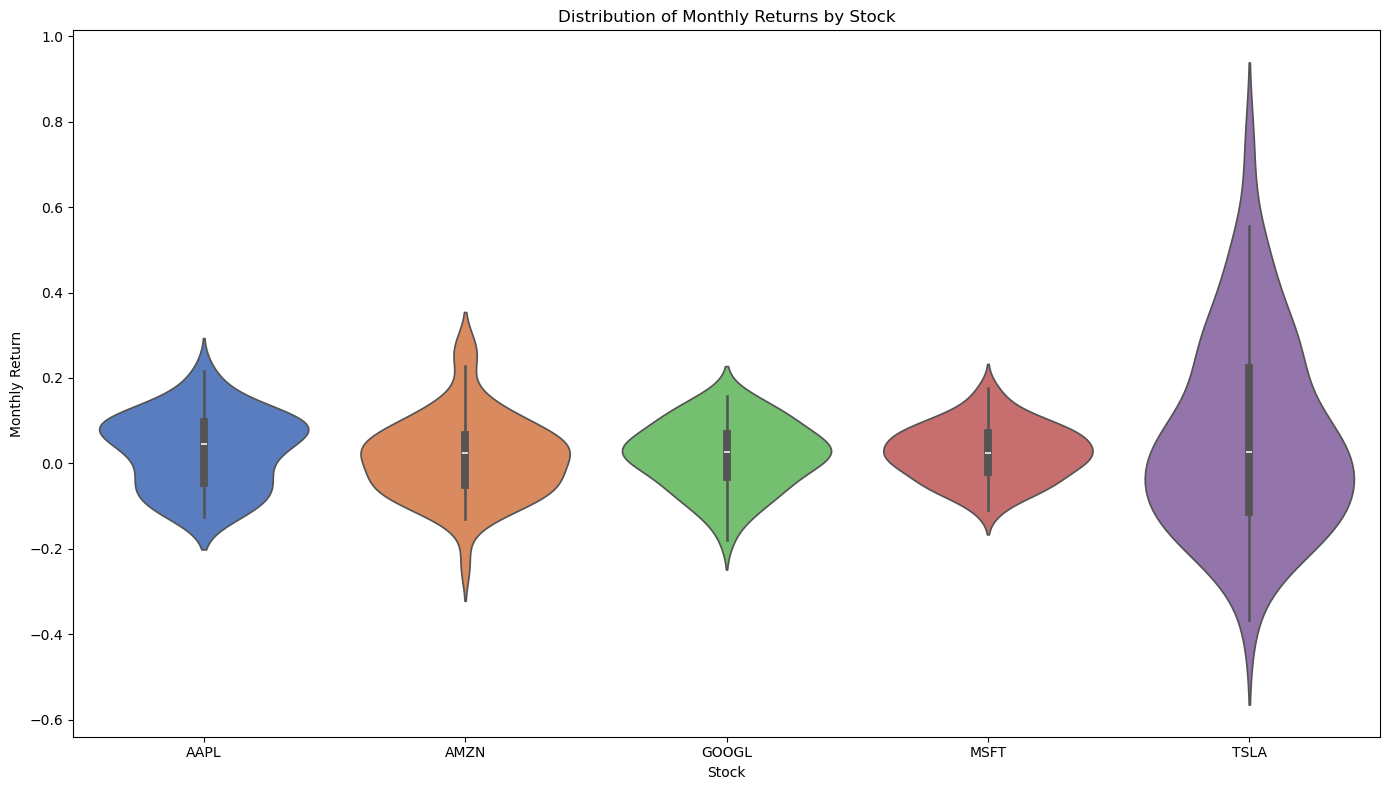

In [ ]:

# Plotting with seaborn
plt.figure(figsize=(14, 8))
sns.violinplot(x='Stock', y='Monthly Return', data=monthly_returns_melted, palette="muted")
plt.title('Distribution of Monthly Returns by Stock')
plt.ylabel('Monthly Return')
plt.xlabel('Stock')

# Show the plot
plt.tight_layout()
plt.show()

## 3.4. Interactive graphs: plotly and bokeh

In [70]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [71]:
import plotly.graph_objects as go
import numpy as np

# Generating data
x = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x)
y2 = np.cos(x)

# Creating figure
fig = go.Figure()

# Adding sine plot
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', name='sin(x)'))

# Adding cosine plot
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='cos(x)'))

# Updating layout
fig.update_layout(title='Sine and Cosine Waves',
                  xaxis_title='x (radians)',
                  yaxis_title='Function Value',
                  legend_title='Function')

# Show plot
fig.show()


In [72]:
%pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [73]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool
import pandas as pd

# Prepare some data (in this case, simple x and y arrays)
data = pd.DataFrame({
    'x_values': [1, 2, 3, 4, 5],
    'y_values': [6, 7, 2, 4, 5],
    'labels': ['A', 'B', 'C', 'D', 'E']
})

# Create a new plot with title and axis labels
p = figure(title="Interactive scatter plot", x_axis_label='x', y_axis_label='y')

# Add a scatter renderer with a size, color, and alpha
p.scatter('x_values', 'y_values', size=10, color="navy", alpha=0.5, source=data)

# Define a new HoverTool object and include it in the tools
hover = HoverTool()
hover.tooltips=[
    ('(x,y)', '(@x_values, @y_values)'),
    ('label', '@labels'),
]
p.add_tools(hover)

# Show the result
show(p)

In [74]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [75]:
%pip install us

Note: you may need to restart the kernel to use updated packages.


## 3.5. Using `geopandas` to plot geographical data

In [76]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import us

# Load US states data
states = us.states.STATES
state_names = [state.name for state in states]

# Using a more appropriate GeoDataFrame for US states
url = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip'
gdf = gpd.read_file(url)
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,22,01629543,0400000US22,22,LA,Louisiana,00,111915258185,23736382213,"POLYGON ((-94.04305 32.69303, -94.04303 32.797..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1478942847588,245378425142,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."
2,24,01714934,0400000US24,24,MD,Maryland,00,25151992308,6979074857,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
3,55,01779806,0400000US55,55,WI,Wisconsin,00,140292321657,29343646672,"MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ..."
4,12,00294478,0400000US12,12,FL,Florida,00,138961722096,45972570361,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."


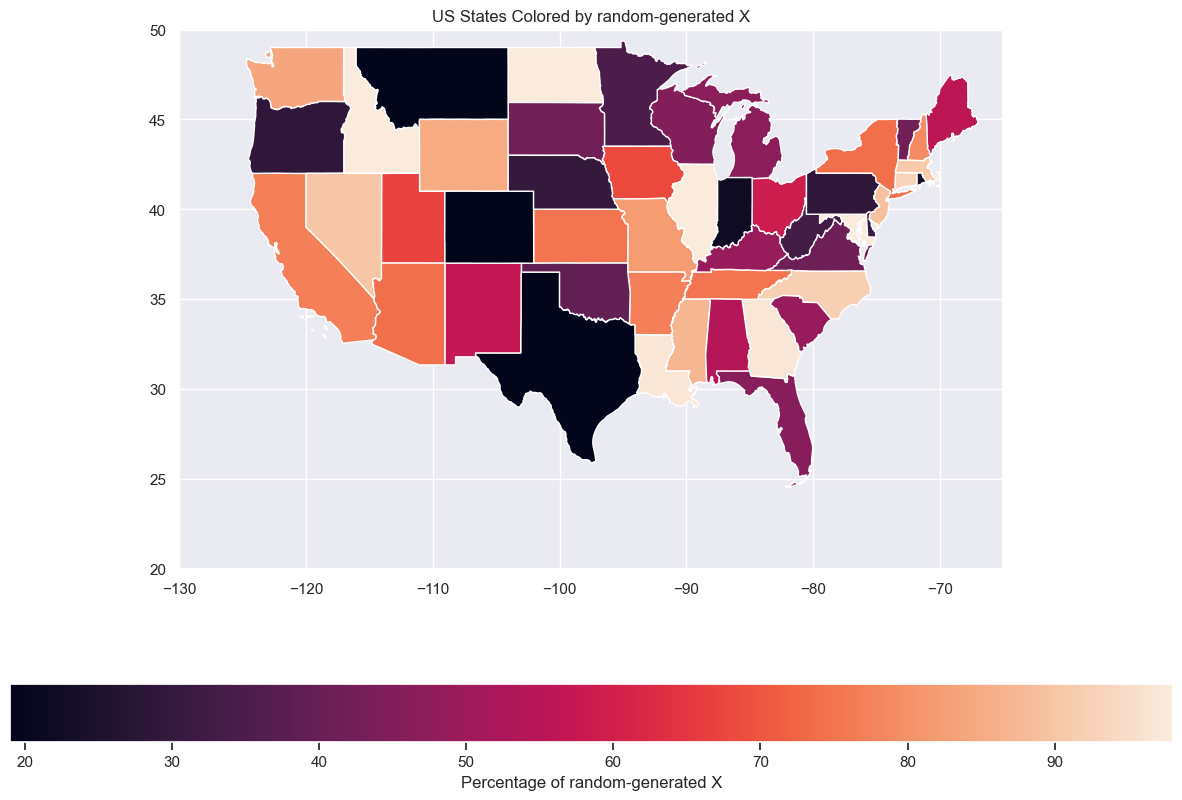

In [77]:
# Create a sample data frame with renewable energy usage percentages
np.random.seed(0)  # For reproducible random results
data = pd.DataFrame({
    'state': state_names,
    'random_variable': np.random.randint(10, 100, size=len(state_names))
})

# Merge this data with the GeoDataFrame
gdf = gdf.merge(data, left_on='NAME', right_on='state')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='random_variable', ax=ax, legend=True,
         legend_kwds={'label': "Percentage of random-generated X",
                      'orientation': "horizontal"})
ax.set_title('US States Colored by random-generated X')
ax.set_xlim(-130, -65)  # Limit the longitude for better focus on the continental US
ax.set_ylim(20, 50)     # Limit the latitude for better focus on the continental US
plt.show()

# References:

McKinney, W. (2018). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O'Reilly Media.